# Exploring Datasets with Python

In this short demo we will analyse a given dataset from 1978, which contains information about politicians having affairs.

To analyse it, we will use a Jupyter Notebook, which is basically a REPL++ for Python. Entering a command with shift executes the line and prints the result.

In [2]:
4 + 4

8

In [3]:
def sum(a, b):
    return a + b

sum(40, 2)

42

In [4]:
import pandas as pd

In [8]:
affairs = pd.read_csv('affairs.csv')
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [9]:
affairs['sex'].head()

0      male
1    female
2    female
3      male
4      male
Name: sex, dtype: object

In [10]:
affairs['sex'].value_counts()

female    315
male      286
Name: sex, dtype: int64

In [11]:
affairs['age'].describe()

count    601.000000
mean      32.487521
std        9.288762
min       17.500000
25%       27.000000
50%       32.000000
75%       37.000000
max       57.000000
Name: age, dtype: float64

In [12]:
affairs['age'].max()

57.0

In [13]:
affairs.describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,1.455907
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,3.298758
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


In [14]:
affairs[affairs['sex'] == 'female'].head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
5,female,32.0,1.50,no,2,17,5,5,0
6,female,22.0,0.75,no,2,12,1,3,0
8,female,32.0,15.00,yes,4,16,1,2,0


In [15]:
affairs[affairs['sex'] == 'female'].describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,30.801587,8.017070,3.107937,15.257143,3.384127,3.939683,1.419048
std,8.646241,5.627237,1.134758,2.023879,1.929094,1.148045,3.309264
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,22.000000,1.500000,2.000000,14.000000,1.000000,3.000000,0.000000
50%,27.000000,7.000000,3.000000,16.000000,4.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,17.000000,5.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


In [16]:
affairs['below_30'] = affairs['age'] < 30

In [17]:
affairs['below_30'].value_counts()

False    325
True     276
Name: below_30, dtype: int64

In [18]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,3,18,7,4,0,False
1,female,27.0,4.00,no,4,14,6,4,0,True
2,female,32.0,15.00,yes,1,12,1,4,0,False
3,male,57.0,15.00,yes,5,18,6,5,0,False
4,male,22.0,0.75,no,2,17,6,3,0,True


In [19]:
rel_meanings = ['not', 'mildly', 'fairly', 'strongly']

In [20]:
affairs['religious'] = affairs['religious'].apply(lambda x: rel_meanings[min(x, 4)-1])

In [21]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,fairly,18,7,4,0,False
1,female,27.0,4.00,no,strongly,14,6,4,0,True
2,female,32.0,15.00,yes,not,12,1,4,0,False
3,male,57.0,15.00,yes,strongly,18,6,5,0,False
4,male,22.0,0.75,no,mildly,17,6,3,0,True


# Visualize Data

To visualize our data, we will use Seaborn, a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Let's import it.

In [22]:
import seaborn as sns

In [23]:
%matplotlib inline
sns.set()
sns.set_context('talk')

 Seaborn together with Pandas makes it pretty easy to create charts to analyze our data. We can pass our Dataframes and Series directly into Seaborn methods. We will see how in the following sections.

# Univariate Plotting

Let's start by visualizing the distribution of the age our our people. We can achieve this with a simple method called distplot by passing our series of ages as argument.

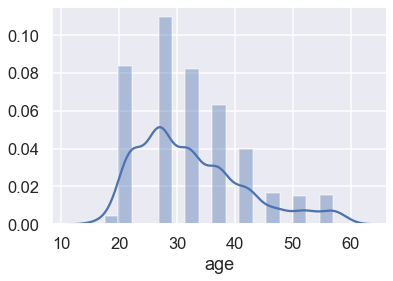

In [24]:
sns.distplot(affairs['age'])

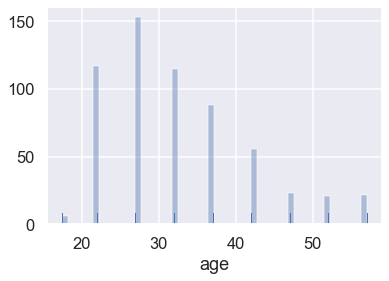

In [25]:
sns.distplot(affairs['age'], bins=50, rug=True, kde=False)

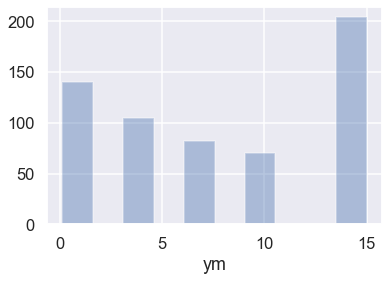

In [26]:
sns.distplot(affairs['ym'], bins=10, kde=False)

The average age of our people is around 32, but the most people are married for more than 14 years!

# Bivariate Plotting

Numbers get even more interesting when we can compare them to other numbers! Lets start comparing the number of years married vs the number of affairs. Seaborn provides us with a method called jointplot for this use case.

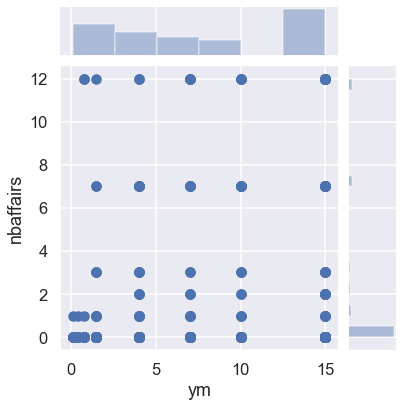

In [27]:
sns.jointplot(affairs['ym'], affairs['nbaffairs'])

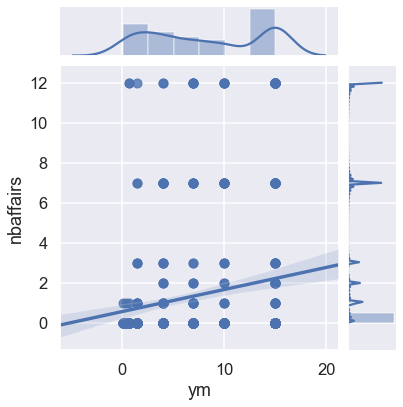

In [28]:
sns.jointplot(affairs['ym'], affairs['nbaffairs'], kind='reg')

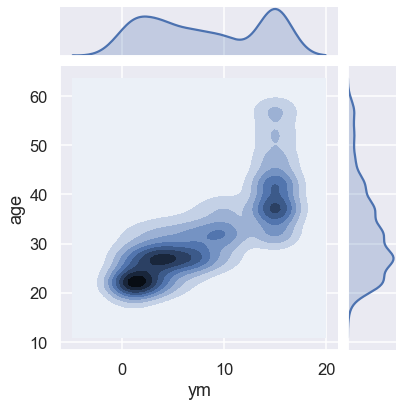

In [29]:
sns.jointplot(affairs['ym'], affairs['age'], kind='kde', shade=True)

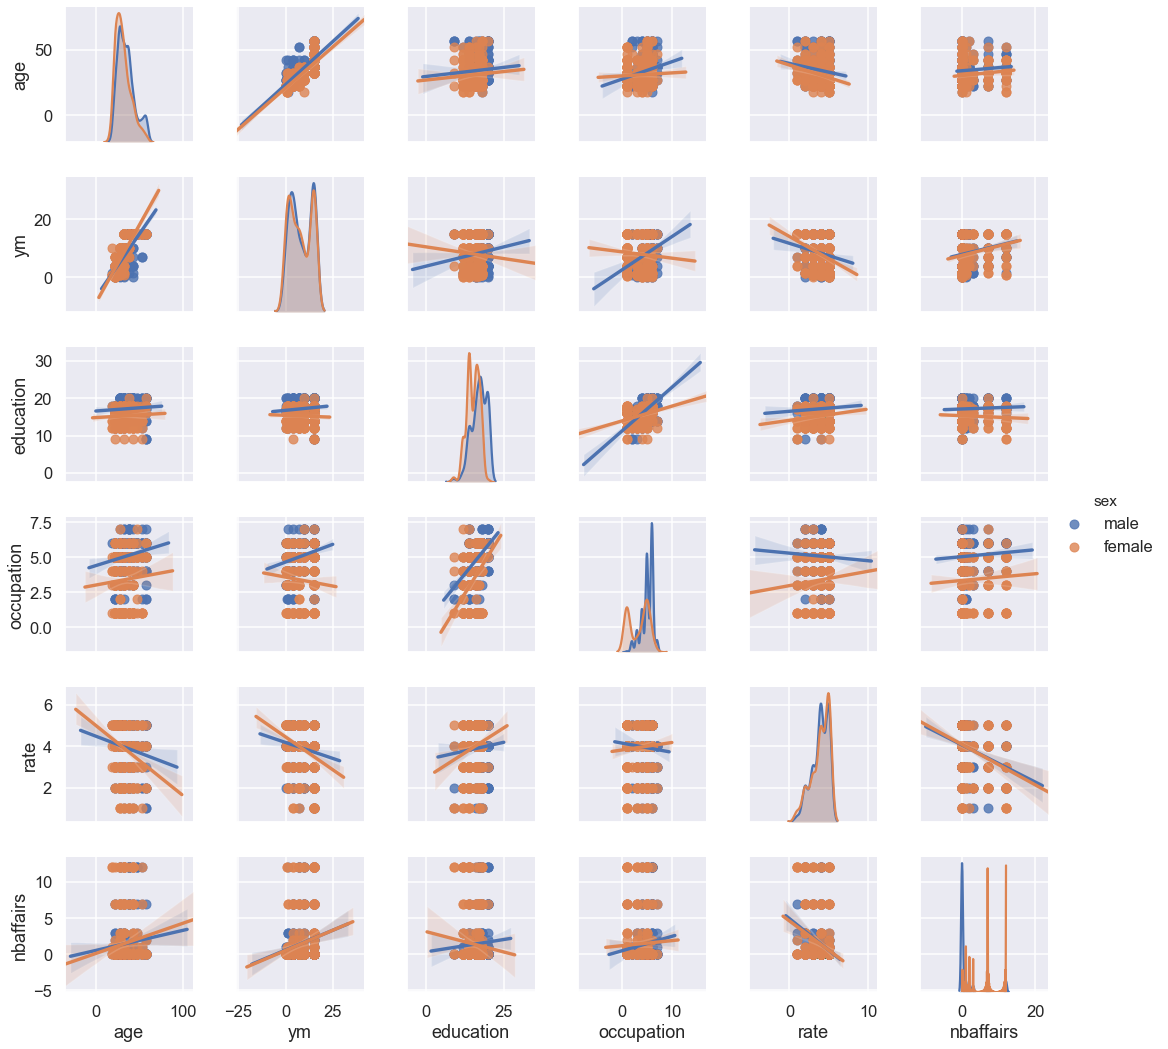

In [32]:
sns.pairplot(affairs.drop('below_30', axis=1), hue='sex', kind='reg')

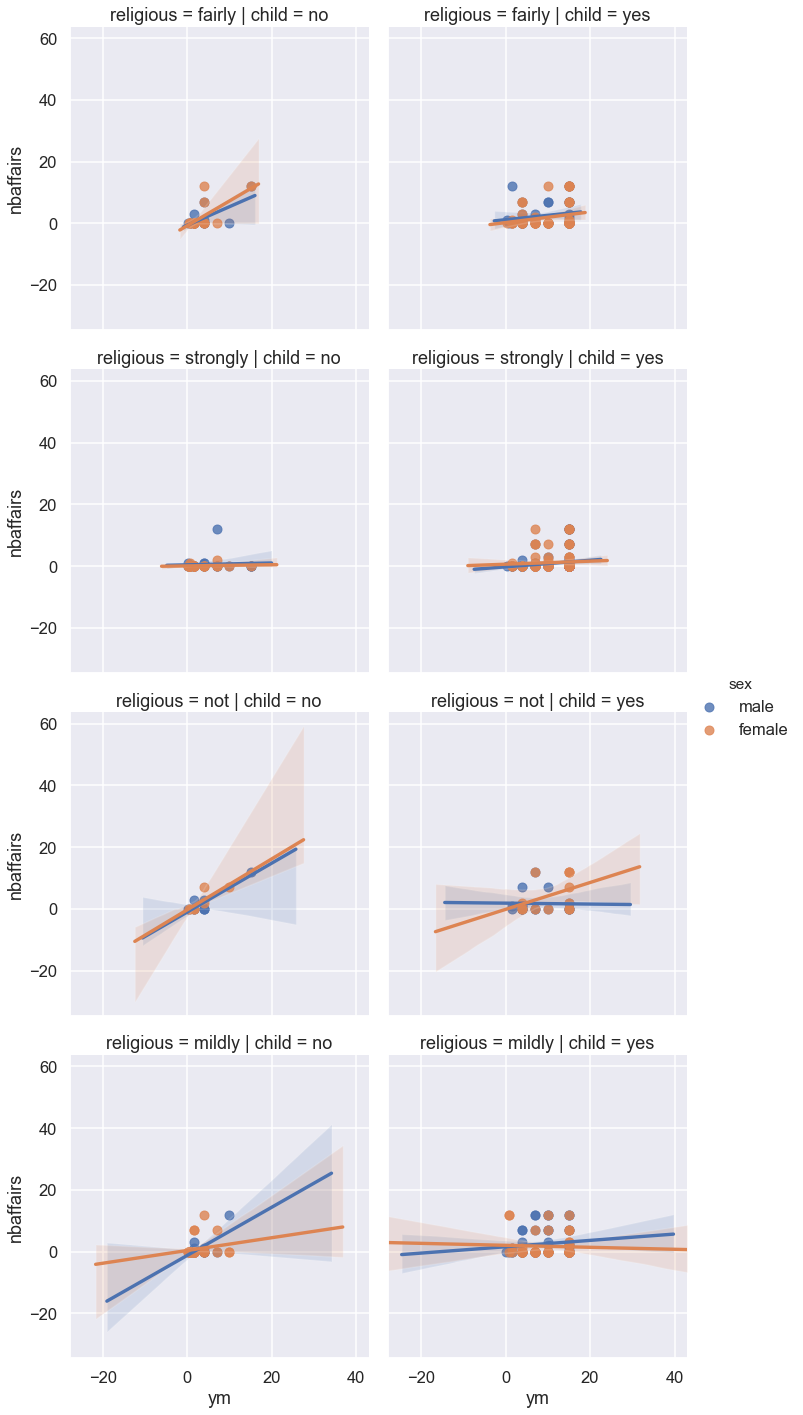

In [36]:
sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)

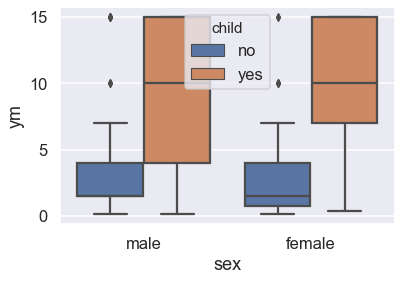

In [34]:
sns.boxplot(x="sex", y="ym", hue="child", data=affairs);

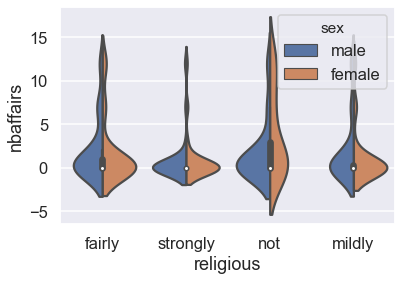

In [35]:
sns.violinplot(x="religious", y="nbaffairs", hue="sex", data=affairs, split=True);


In [37]:
affairs.corr()

,age,ym,education,occupation,rate,nbaffairs,below_30
age,1.000000,0.777546,0.134596,0.166413,-0.199000,0.095237,-0.775833
ym,0.777546,1.000000,0.040003,0.044592,-0.243119,0.186842,-0.763049
education,0.134596,0.040003,1.000000,0.533605,0.109303,-0.002437,-0.144546
occupation,0.166413,0.044592,0.533605,1.000000,0.017422,0.049612,-0.146437
rate,-0.199000,-0.243119,0.109303,0.017422,1.000000,-0.279512,0.181229
nbaffairs,0.095237,0.186842,-0.002437,0.049612,-0.279512,1.000000,-0.149754
below_30,-0.775833,-0.763049,-0.144546,-0.146437,0.181229,-0.149754,1.000000


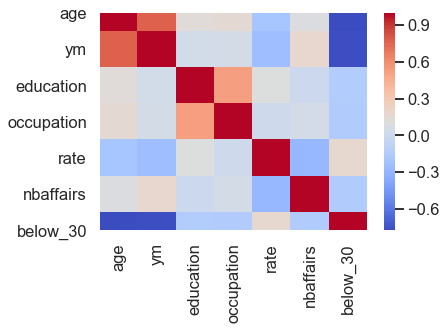

In [38]:
sns.heatmap(affairs.corr(), cmap='coolwarm')